In [1]:
import platform
print(platform.python_version())

3.9.13


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install pandas keras tensorflow matplotlib numpy setuptools scikit-learn seaborn imblearn


In [4]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt

np.random.seed(2)

In [5]:
data = pd.read_csv('creditcard.csv')

## Data exploration

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
len(data)

284807

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


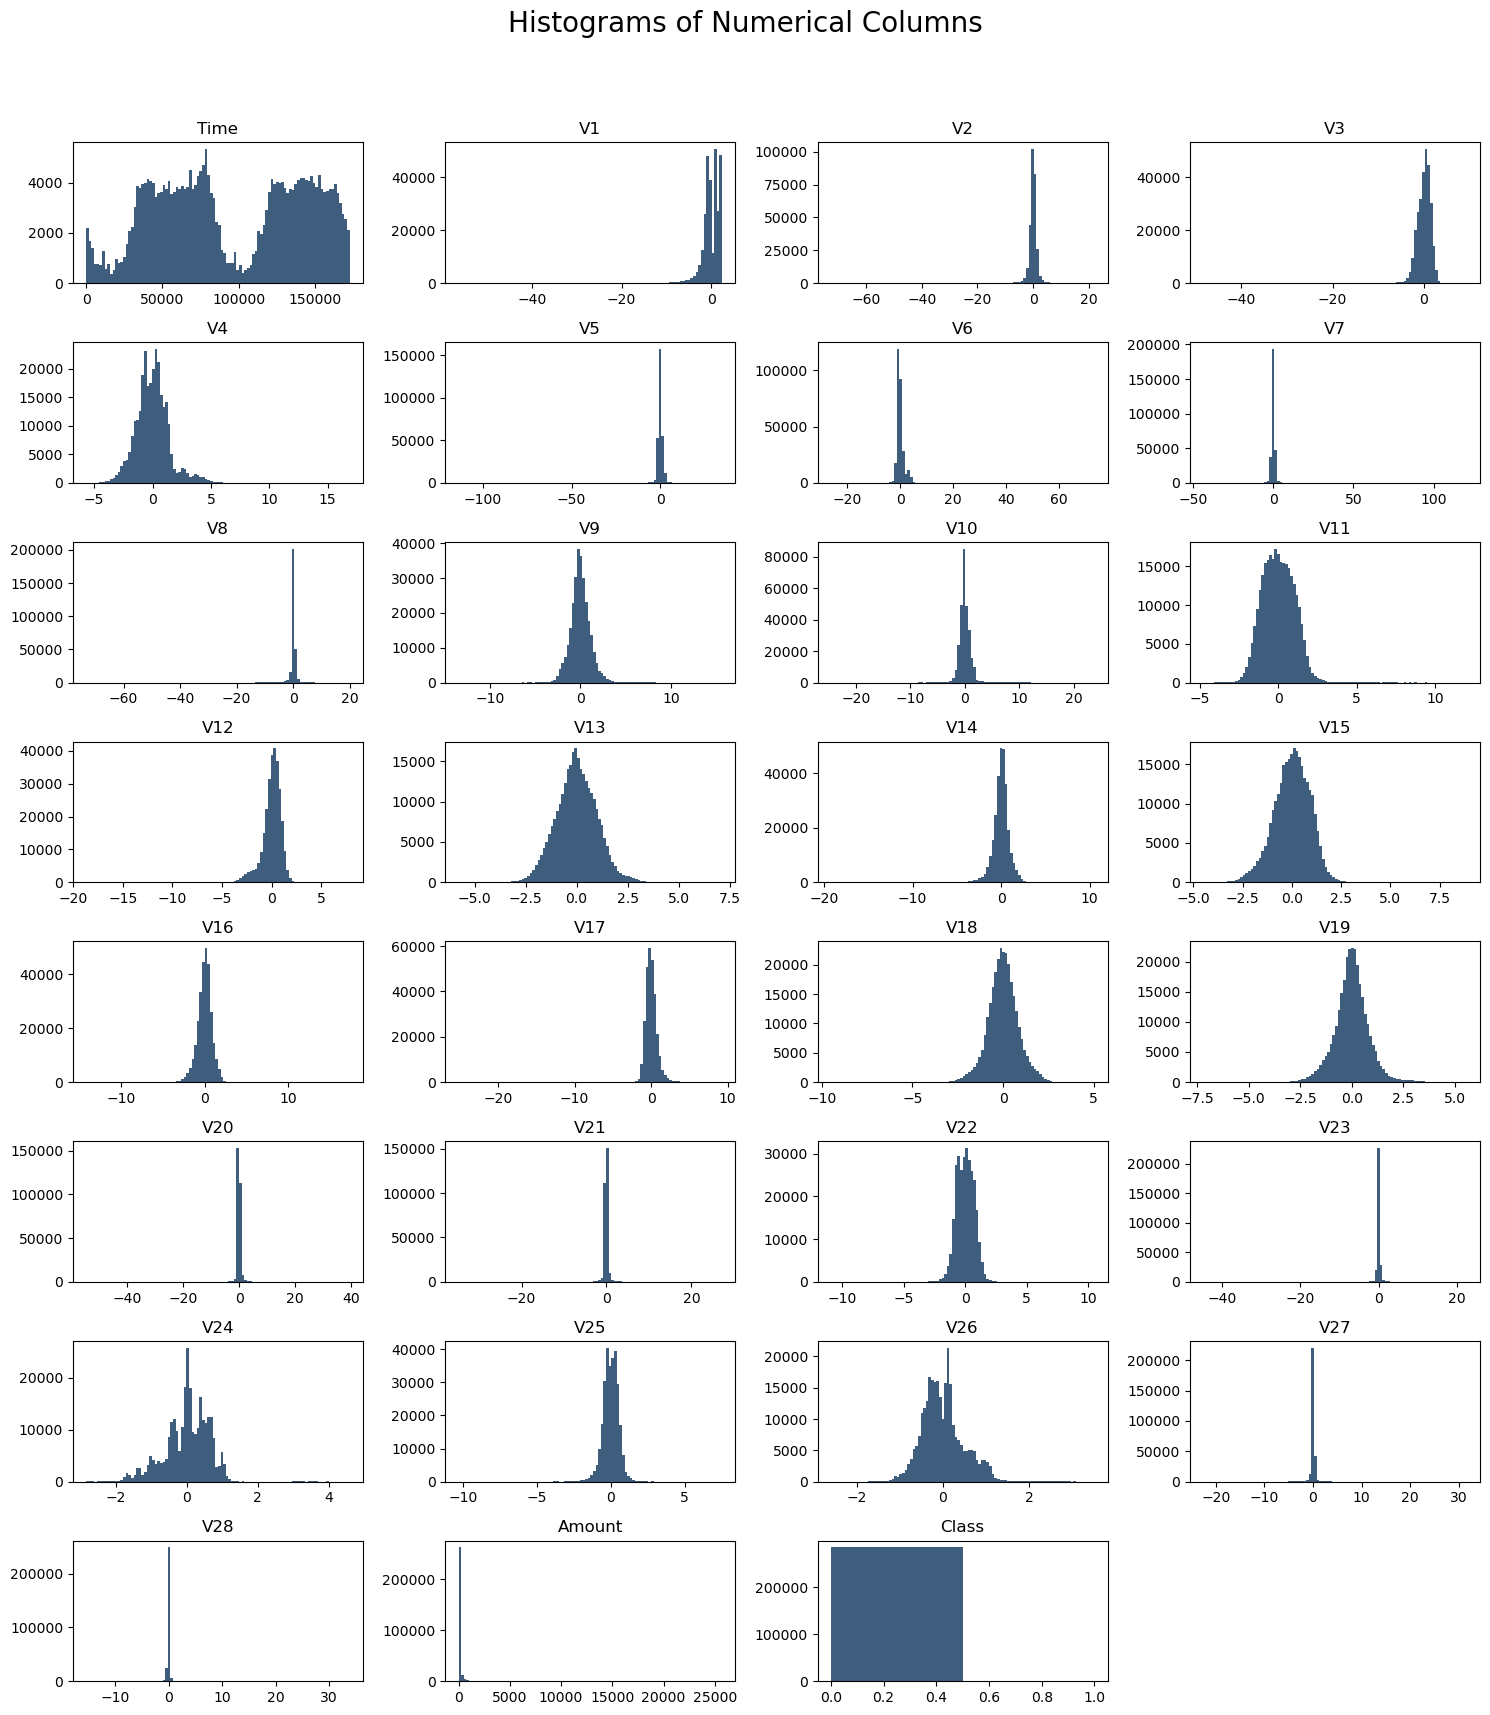

In [9]:
## Histograms
fig = plt.figure(figsize=(15, 18))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(data.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(data.columns.values[i])

    vals = np.size(data.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                    # limit our bins to 100 maximum
    
    plt.hist(data.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

- we can observe a large prevalence of Class 0 (non fraudulent).

In [10]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(data[data.Class==1]), len(data[data.Class==1])/len(data)*100000))

Number of fraudulent transactions = 492 or 172 per 100,000 transactions in the dataset


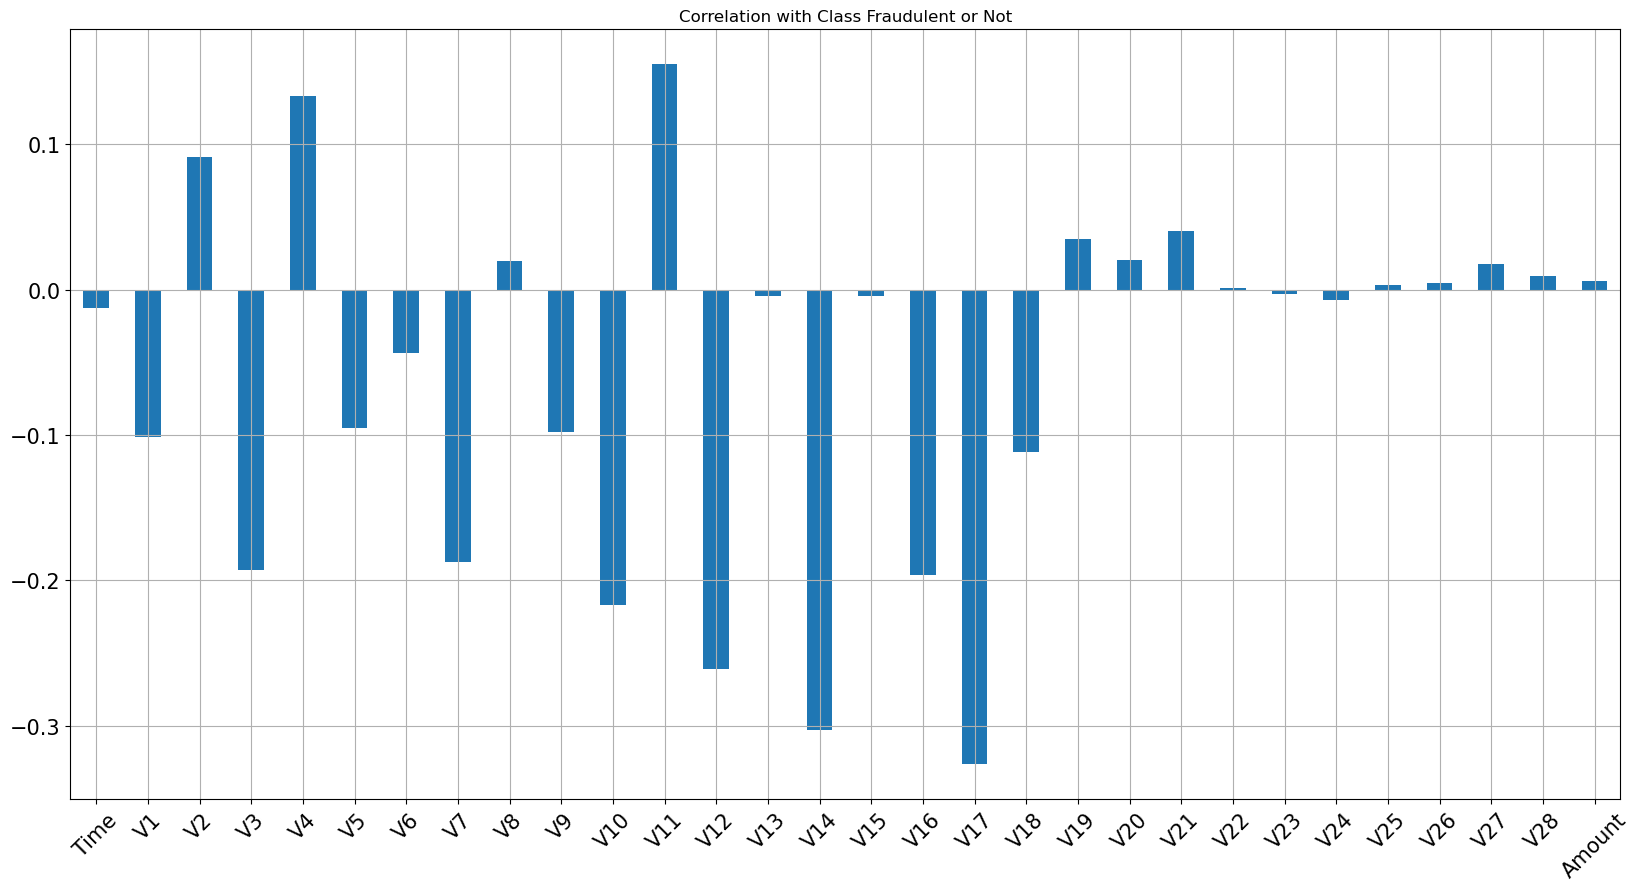

In [11]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
data2 = data.drop(columns = ['Class'])   # drop non numerical columns
data2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

## Pre-processing

In [12]:
!pip install threadpoolctl sklearn

In [13]:
from sklearn.preprocessing import StandardScaler
import threadpoolctl
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
data = data.drop(['Amount'],axis=1)

In [14]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [15]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [16]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']  # Response variable determining if fraudulent or not

In [17]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [19]:
X_train.shape

(199364, 29)

In [20]:
X_test.shape

(85443, 29)

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
random_forest = RandomForestClassifier(n_estimators=100)

In [23]:
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier()

In [24]:
y_pred = random_forest.predict(X_test)

In [25]:
random_forest.score(X_test,y_test)

0.9995435553526912

In [26]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [27]:
# Approach to plot confusion matrix (from scikit-learn.org site)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[85290     6]
 [   33   114]]


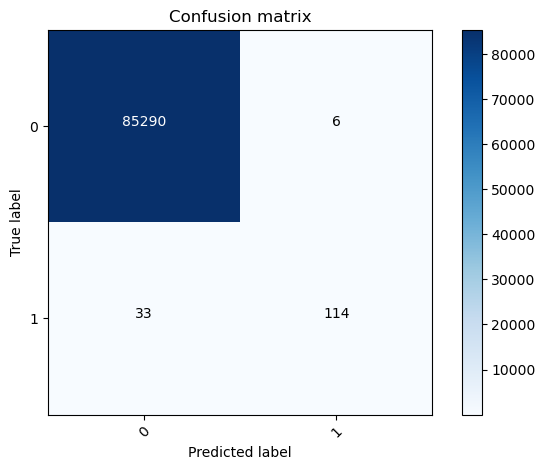

In [28]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

- while only 6 regular transactions are wrongly predicted as fraudulent, the model only detects 78% of the fraudulent transactions. As a consequence 33 fraudulent transactions are not detected (False Negatives).
- Let's see if we can improve this performance with other machine learning / deep learning models in the rest of the notebook.

In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print('accuracy:%0.4f' % acc, '\tprecision:%0.4f' % prec, '\trecall:%0.4f' % rec, '\tF1-score:%0.4f' % f1)

accuracy:0.9995 	precision:0.9500 	recall:0.7755 	F1-score:0.8539


Let's store each model's performance in a dataframe for comparison purpose

In [30]:
### Store results in dataframe for comparing various Models
results_testset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.22449,0.77551,0.95,0.853933


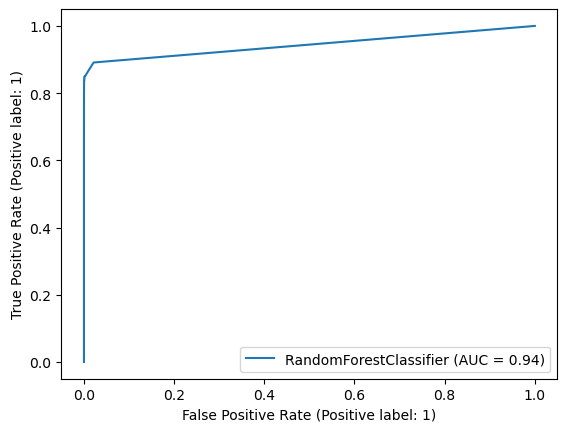

In [31]:
# Plot ROC curve
ROC_RF = RocCurveDisplay.from_estimator(random_forest, X_test, y_test)
plt.show()

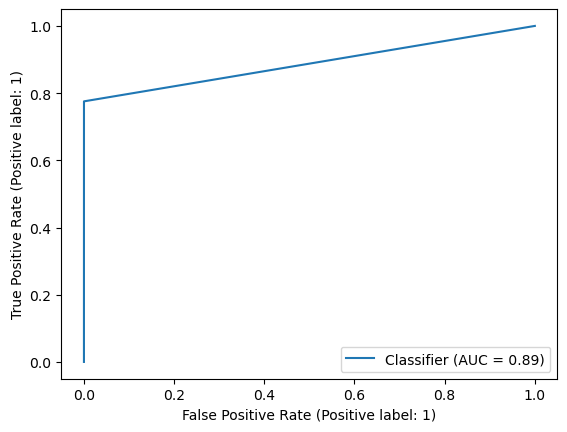

In [32]:
RocCurveDisplay.from_predictions(y_test, y_pred)


We will run the models on the full dataset to check.

Confusion matrix, without normalization
[[284309      6]
 [    34    458]]


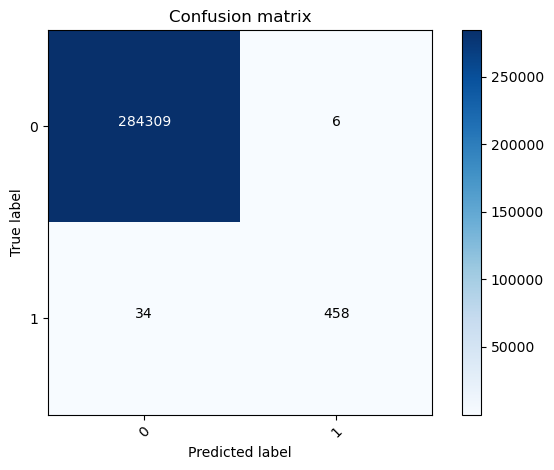

In [33]:
# Confusion matrix on the whole dataset
y_pred = random_forest.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [34]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9999 	precision:0.9871 	recall:0.9309 	F1-score:0.9582


In [35]:
results_fullset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.99986,0.069106,0.930894,0.987069,0.958159


## Decision trees

In [36]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [37]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [38]:
y_pred = decision_tree.predict(X_test)

In [39]:
decision_tree.score(X_test,y_test)

0.9992392589211521

Confusion matrix, without normalization
[[85267    29]
 [   36   111]]


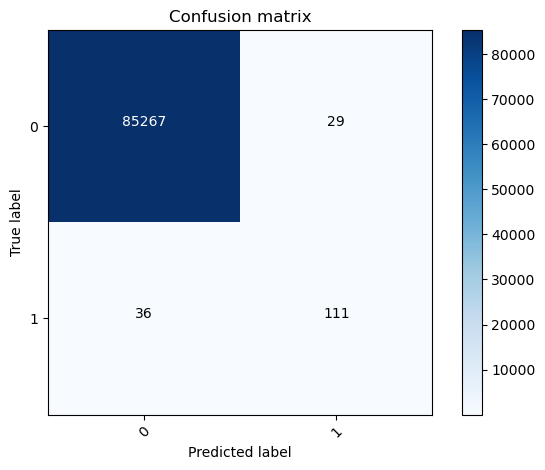

In [40]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

- The performance of the Decision Tree model is below the one using Random Forest. Let's check the performance indicators.

In [41]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [42]:
# Create the new DataFrame with the model results
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

# Use pd.concat to combine the DataFrames
results_testset = pd.concat([results_testset, model_results], ignore_index=True)

results_testset


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519


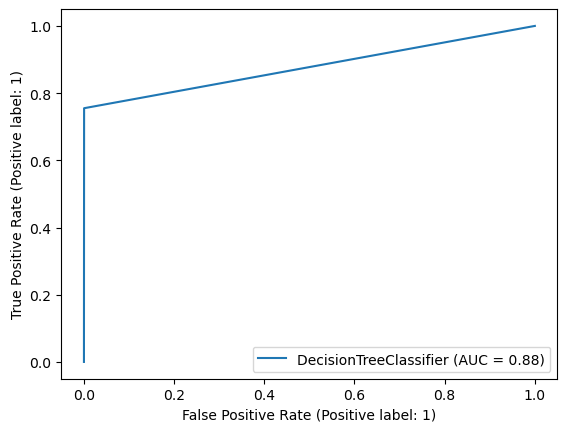

In [43]:
ROC_DT = RocCurveDisplay.from_estimator(decision_tree, X_test, y_test)
plt.show()

Confusion matrix, without normalization
[[284286     29]
 [    36    456]]


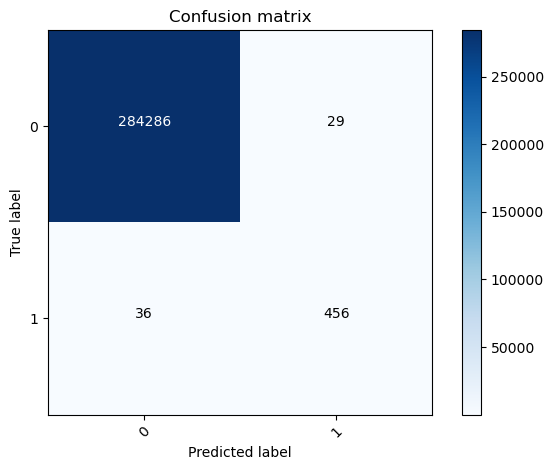

In [44]:
# Confusion matrix on the whole dataset
y_pred = decision_tree.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [45]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

In [46]:

# Create the new DataFrame with the model results
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

# Use pd.concat to combine the DataFrames
results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)

results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470


## Let's now explore Neural Network models

In [47]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep neural network
- We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 29 as input. This represents the information related to each transactions, ie each line with 29 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not fraudulent (0) or fraudulent (1).
- a dropout step is included to prevent overfitting.

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [49]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,113
Trainable params: 2,113
Non-trainabl

## Training

In [51]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 34s 2ms/step - loss: 0.0080 - accuracy: 0.9990
Epoch 2/5
13291/13291 [==============================] - 32s 2ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 29s 2ms/step - loss: 0.0036 - accuracy: 0.9993


In [52]:
score = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0036 - accuracy: 0.9994


In [53]:
print(score)

[0.00356064410880208, 0.9993680119514465]


- The model achieves an accuracy of 99.94% ! Is this a good performance ?
- Remember that our dataset is significantly composed of non fraudulent samples with only 172 fraudulent transactions per 100,000. Consequently, a model predicting every transaction as 'non fraudulent' would achieve 99.83% accuracy despite being unable to detect a single fraudulent case !

2671/2671 [==============================] - 4s 2ms/step
Test Data Accuracy: 0.9994


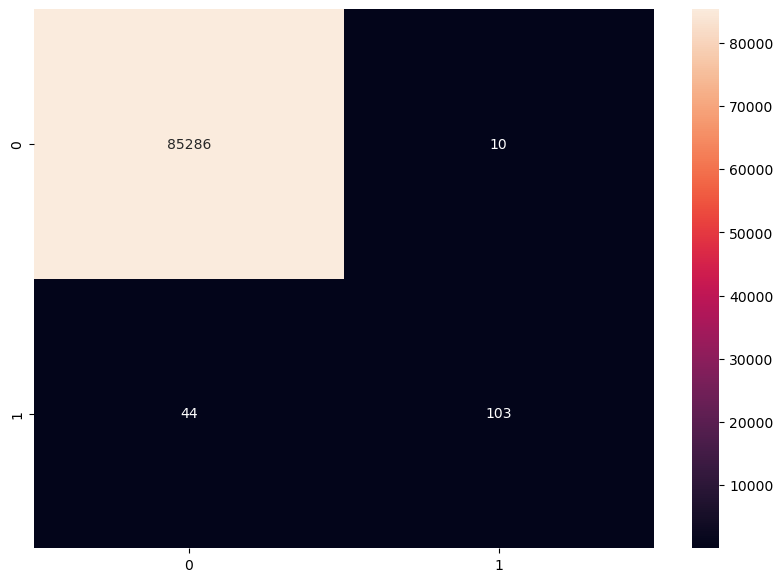

In [54]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Detection of fraudulent transactions did not improve compared to the previous machine learning models.
- 115 fraudulent transactions are detected as fraudulent by the model, yet 32 fraudulent transactions are not identified (false negative) which remains an issue. Our objective must be to detect as many fraudulent transactions as possible since these can have a huge negative impact.
- 21 regular transactions are detected as potentially fraudulent by the model. These are false positive. This number is negligible.

Conclusion : We must find ways to further reduce the number of false negative.

In [55]:
# Alternative approach to plot confusion matrix (from scikit-learn.org site)
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)    # Pandas format required by confusion_matrix function

2671/2671 [==============================] - 4s 2ms/step


In [56]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())   # y_pred.round() to convert probability to either 0 or 1 in line with y_test

In [57]:
print(cnf_matrix)

[[85286    10]
 [   44   103]]


Confusion matrix, without normalization
[[85286    10]
 [   44   103]]


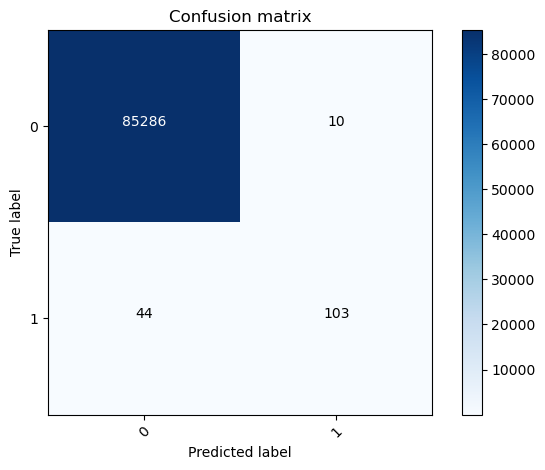

In [58]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [59]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [60]:

# Create the new DataFrame with the model results
model_results = pd.DataFrame([['PlainNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

# Use pd.concat to combine the DataFrames
results_testset = pd.concat([results_testset, model_results], ignore_index=True)

results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999368,0.299320,0.700680,0.911504,0.792308


8901/8901 [==============================] - 14s 2ms/step
Confusion matrix, without normalization
[[284283     32]
 [   156    336]]


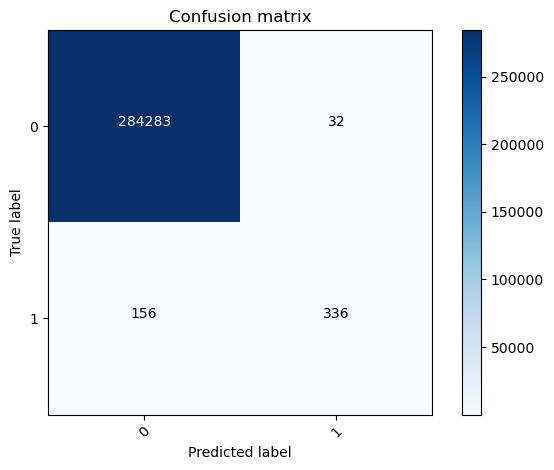

In [61]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [62]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [63]:
# Create the new DataFrame with the model results
model_results = pd.DataFrame([['PlainNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

# Use pd.concat to combine the DataFrames
results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)

results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999340,0.317073,0.682927,0.913043,0.781395


### Weighted loss to account for large class imbalance in train dataset
- we will adjust the class imbalance by giving additional weight to the loss associated to errors made on fraudulent transaction detection. Let's review the process:

In [64]:
from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train[i][0] for i in range(len(y_train))]))
# class_weights = dict(enumerate(class_weights))
# class_weights
flat_y_train = np.ravel(y_train)  # Flatten y_train to ensure it's a 1D array if it's 2D

# Compute class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train), 
    y=flat_y_train
)
# Convert to dictionary format
class_weights_dict = dict(zip(np.unique(y_train), class_weights_array))


- The class 'Fraudulent' (y=1) is assigned a weight of 289 vs 0.5 for the class 'not fraudulent' due to the very low prevalence we detected during data exploration. This allows the model to give more importance to the errors made on fraudulent cases during training.

In [65]:
model.fit(X_train, y_train, batch_size=15, epochs=5, class_weight=class_weights_dict, shuffle=True)

Epoch 1/5
13291/13291 [==============================] - 34s 3ms/step - loss: 0.2510 - accuracy: 0.9824
Epoch 2/5
13291/13291 [==============================] - 33s 2ms/step - loss: 0.1877 - accuracy: 0.9834
Epoch 3/5
13291/13291 [==============================] - 34s 3ms/step - loss: 0.1441 - accuracy: 0.9740
Epoch 4/5
13291/13291 [==============================] - 33s 2ms/step - loss: 0.4478 - accuracy: 0.9717
Epoch 5/5
13291/13291 [==============================] - 35s 3ms/step - loss: 0.1699 - accuracy: 0.9657


In [66]:
score_weighted = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0827 - accuracy: 0.9646


In [67]:
print(score_weighted)

[0.08270818740129471, 0.9646080136299133]


2671/2671 [==============================] - 4s 2ms/step
Test Data Accuracy: 0.9646


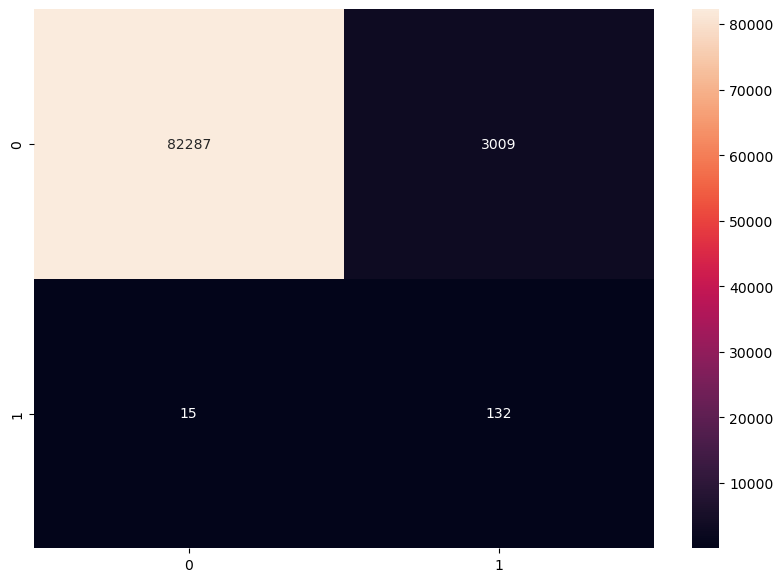

In [68]:
## Confusion Matrix on unseen test set
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

- The accuracy reduced a bit. We need to look at more detailed evaluation measures like precision and recall to gauge the true model performance.
- The model is actually much better at detecting fraudulent cases now. We have a lower False negative rate which is the key criteria for our purpose (detect a fraud when there is one).
- But on the other hand, the model generates an excessive number of false positive compared to the previous approaches. 

In [69]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [70]:
# ### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['WeightedNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

# Append new results to the existing DataFrame using concat
results_testset = pd.concat([results_testset, model_results], ignore_index=True)

# Display the updated DataFrame
results_testset


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999368,0.299320,0.700680,0.911504,0.792308
3,WeightedNeuralNetwork,0.964608,0.102041,0.897959,0.042025,0.080292


- Although the recall metric improves, the F1-score collapses due to extremely poor precision. Given the very high number of transactions processed, the excessive number of false positives is clearly an issue.

8901/8901 [==============================] - 15s 2ms/step
Confusion matrix, without normalization
[[274333   9982]
 [    19    473]]


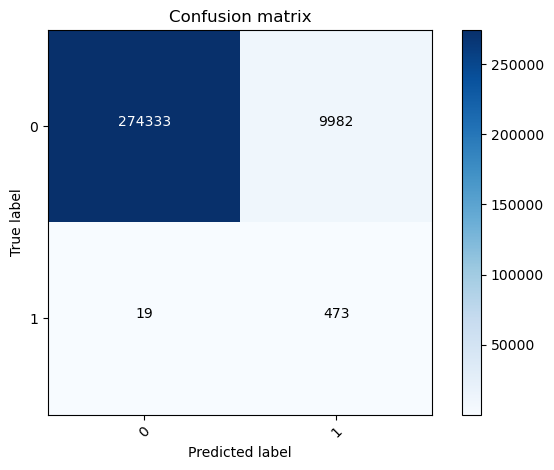

In [71]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [72]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [73]:
model_results = pd.DataFrame([['WeightedNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

# Append new results to the existing DataFrame using concat
results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)

# Display the updated DataFrame
results_fullset


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999340,0.317073,0.682927,0.913043,0.781395
3,WeightedNeuralNetwork,0.964885,0.038618,0.961382,0.045242,0.086416


## Undersampling
- In order to balance the train set, another technique is undersampling. With this technique, we adjust the largest class to match the number of samples of the under-represented class. Here we want to randomly pick an amount of non-fraudulent transactions equal to the number of fraudulent transactions in the dataset.

In [74]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [75]:
normal_indices = data[data.Class == 0].index

In [76]:
len(normal_indices)

284315

In [77]:
# Random select N indices from non fraudulent samples (N equals to number of fraudulent records)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [78]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [79]:
under_sample_data = data.iloc[under_sample_indices,:]

In [80]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [82]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,113
Trainable params: 2,113
Non-trainabl

In [84]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
46/46 [==============================] - 1s 2ms/step - loss: 0.2252 - accuracy: 0.9578
Epoch 2/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9695
Epoch 3/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9738
Epoch 4/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1000 - accuracy: 0.9651
Epoch 5/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 0.9753


10/10 [==============================] - 0s 2ms/step
Confusion matrix, without normalization
[[140   6]
 [  9 141]]


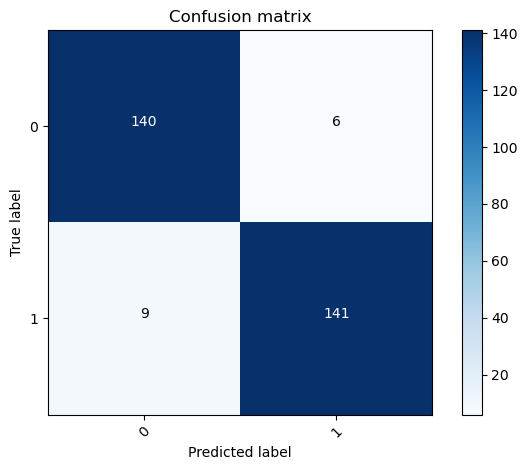

In [85]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

- The metrics look pretty strong on the test set....

In [86]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [87]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
# Use pd.concat to combine the DataFrames
results_testset = pd.concat([results_testset, model_results], ignore_index=True)

results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999368,0.299320,0.700680,0.911504,0.792308
3,WeightedNeuralNetwork,0.964608,0.102041,0.897959,0.042025,0.080292
4,UnderSampledNeuralNetwork,0.949324,0.060000,0.940000,0.959184,0.949495


....But the model fails on non fraudulent transactions as shown below.

8901/8901 [==============================] - 13s 1ms/step
Confusion matrix, without normalization
[[271033  13282]
 [    19    473]]


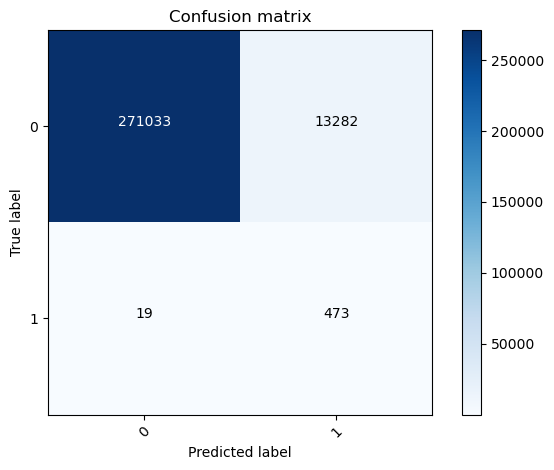

In [88]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [89]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [90]:
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)

results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999340,0.317073,0.682927,0.913043,0.781395
3,WeightedNeuralNetwork,0.964885,0.038618,0.961382,0.045242,0.086416
4,UnderSampledNeuralNetwork,0.953298,0.038618,0.961382,0.034387,0.066400


## Oversampling technique using SMOTE
(Synthetic Minority Oversample TEchnique)
- the alternative to down-sampling is the upsampling of the minority class to the same level as the dominant one.
- This can be achieved with the SMOTE method where a new vector is generated between 2 existing datapoints. Applying this technique allows to massively increase the number of fraudulent transactions

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X, y)


In [93]:
y_resample

,Class
0,0
1,0
2,0
3,0
4,0
...,...
568625,1
568626,1
568627,1
568628,1


In [94]:
print('Number of total transactions before SMOTE upsampling: ', len(y), '...after SMOTE upsampling: ', len(y_resample))
print('Number of fraudulent transactions before SMOTE upsampling: ', len(y[y.Class==1]), 
      '...after SMOTE upsampling: ', np.sum(y_resample[y_resample==1]))

Number of total transactions before SMOTE upsampling:  284807 ...after SMOTE upsampling:  568630
Number of fraudulent transactions before SMOTE upsampling:  492 ...after SMOTE upsampling:  Class    284315.0
dtype: float64


In [95]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [97]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [98]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [99]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
26537/26537 [==============================] - 63s 2ms/step - loss: 0.0462 - accuracy: 0.9833
Epoch 2/5
26537/26537 [==============================] - 68s 3ms/step - loss: 0.0188 - accuracy: 0.9945
Epoch 3/5
26537/26537 [==============================] - 58s 2ms/step - loss: 0.0143 - accuracy: 0.9961
Epoch 4/5
26537/26537 [==============================] - 57s 2ms/step - loss: 0.0122 - accuracy: 0.9968
Epoch 5/5
26537/26537 [==============================] - 58s 2ms/step - loss: 0.0106 - accuracy: 0.9973


5331/5331 [==============================] - 8s 2ms/step
Confusion matrix, without normalization
[[84926   327]
 [  384 84952]]


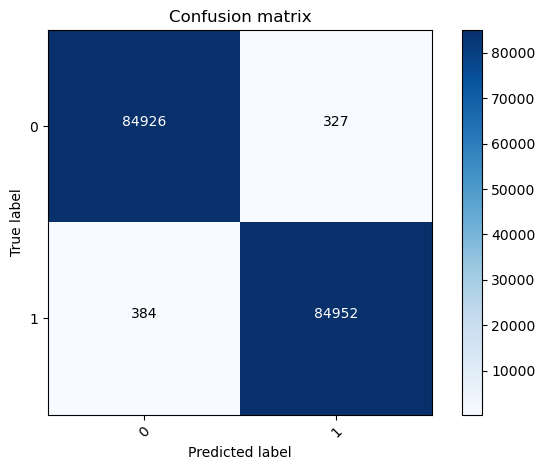

In [100]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

- Notice the absence of False Negatives. The model is able to detect all fraudulent transactions on the unseen test set.

In [101]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [102]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = pd.concat([results_testset,model_results],ignore_index=True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999368,0.299320,0.700680,0.911504,0.792308
3,WeightedNeuralNetwork,0.964608,0.102041,0.897959,0.042025,0.080292
4,UnderSampledNeuralNetwork,0.949324,0.060000,0.940000,0.959184,0.949495
5,OverSampledNeuralNetwork,0.995832,0.004500,0.995500,0.996166,0.995833


All metrics are excellent for this last model.

8901/8901 [==============================] - 13s 1ms/step
Confusion matrix, without normalization
[[283341    974]
 [     5    487]]


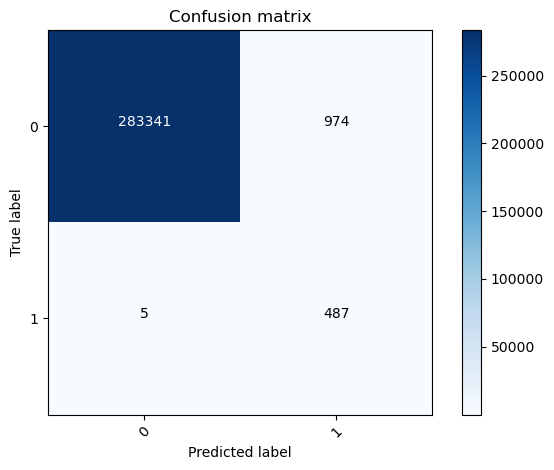

In [103]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

- Notice the absence of False Negatives. The model is able to detect all fraudulent transactions on the full dataset.
- Notice the limited number of False Positives which means a lot less verification work (on legitimate transactions) for the fraud departement

In [104]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [105]:
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = pd.concat([results_fullset,model_results], ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999340,0.317073,0.682927,0.913043,0.781395
3,WeightedNeuralNetwork,0.964885,0.038618,0.961382,0.045242,0.086416
4,UnderSampledNeuralNetwork,0.953298,0.038618,0.961382,0.034387,0.066400
5,OverSampledNeuralNetwork,0.996563,0.010163,0.989837,0.333333,0.498720


In [106]:
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999368,0.299320,0.700680,0.911504,0.792308
3,WeightedNeuralNetwork,0.964608,0.102041,0.897959,0.042025,0.080292
4,UnderSampledNeuralNetwork,0.949324,0.060000,0.940000,0.959184,0.949495
5,OverSampledNeuralNetwork,0.995832,0.004500,0.995500,0.996166,0.995833


## Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [108]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=1000)

Confusion matrix, without normalization
[[83080  2173]
 [ 7162 78174]]


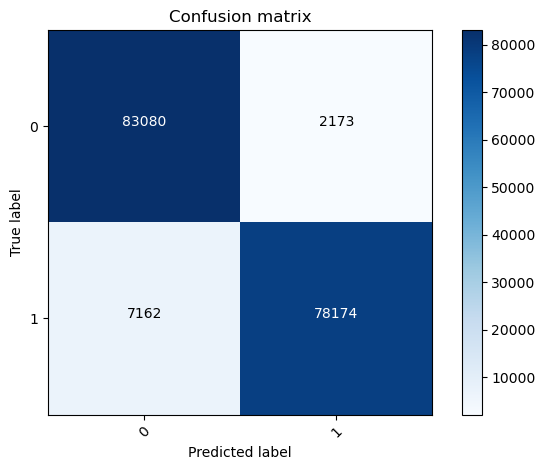

In [109]:
# Predict on the test set
y_pred = lr_model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [110]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [111]:
# Store test set results
model_results = pd.DataFrame([['LogisticRegression', acc, 1-rec, rec, prec, f1]],
                                  columns=['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = pd.concat([results_testset, model_results], ignore_index=True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999368,0.299320,0.700680,0.911504,0.792308
3,WeightedNeuralNetwork,0.964608,0.102041,0.897959,0.042025,0.080292
4,UnderSampledNeuralNetwork,0.949324,0.060000,0.940000,0.959184,0.949495
5,OverSampledNeuralNetwork,0.995832,0.004500,0.995500,0.996166,0.995833
6,LogisticRegression,0.945278,0.083927,0.916073,0.972955,0.943657


D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Confusion matrix, without normalization
[[277184   7131]
 [    39    453]]


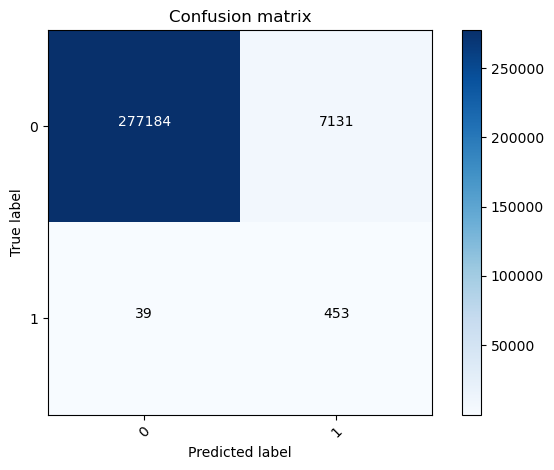

In [112]:
y_pred = lr_model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [113]:
# Evaluate on the full set
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

In [114]:
# Store full set results
model_results = pd.DataFrame([['LogisticRegression', acc, 1-rec, rec, prec, f1]],
                                  columns=['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999340,0.317073,0.682927,0.913043,0.781395
3,WeightedNeuralNetwork,0.964885,0.038618,0.961382,0.045242,0.086416
4,UnderSampledNeuralNetwork,0.953298,0.038618,0.961382,0.034387,0.066400
5,OverSampledNeuralNetwork,0.996563,0.010163,0.989837,0.333333,0.498720
6,LogisticRegression,0.974825,0.079268,0.920732,0.059731,0.112184


## XGBoost

In [115]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [116]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train.ravel())

D:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

Confusion matrix, without normalization
[[85192    61]
 [    0 85336]]


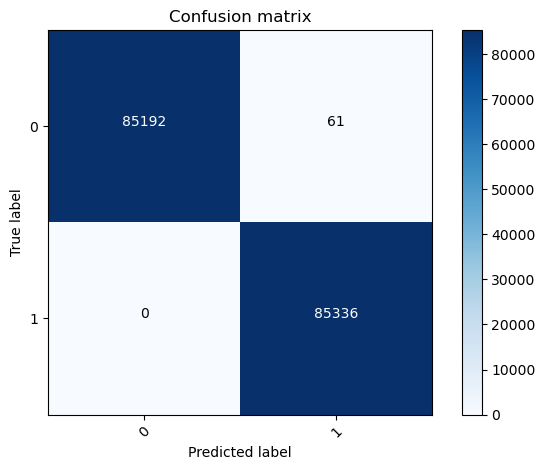

In [117]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [118]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [119]:
# Store test set results
model_results = pd.DataFrame([['XGBoost', acc, 1-rec, rec, prec, f1]],
                                      columns=['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = pd.concat([results_testset, model_results], ignore_index=True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999368,0.299320,0.700680,0.911504,0.792308
3,WeightedNeuralNetwork,0.964608,0.102041,0.897959,0.042025,0.080292
4,UnderSampledNeuralNetwork,0.949324,0.060000,0.940000,0.959184,0.949495
5,OverSampledNeuralNetwork,0.995832,0.004500,0.995500,0.996166,0.995833
6,LogisticRegression,0.945278,0.083927,0.916073,0.972955,0.943657
7,XGBoost,0.999642,0.000000,1.000000,0.999286,0.999643


D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Confusion matrix, without normalization
[[277184   7131]
 [    39    453]]


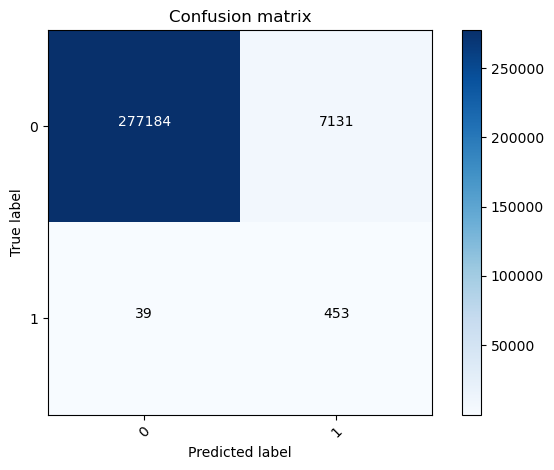

In [120]:
y_pred = lr_model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [121]:
# Evaluate on the full set
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

In [122]:
# Store full set results
model_results = pd.DataFrame([['XGBoost', acc, 1-rec, rec, prec, f1]],
                                      columns=['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999340,0.317073,0.682927,0.913043,0.781395
3,WeightedNeuralNetwork,0.964885,0.038618,0.961382,0.045242,0.086416
4,UnderSampledNeuralNetwork,0.953298,0.038618,0.961382,0.034387,0.066400
5,OverSampledNeuralNetwork,0.996563,0.010163,0.989837,0.333333,0.498720
6,LogisticRegression,0.974825,0.079268,0.920732,0.059731,0.112184
7,XGBoost,0.974825,0.079268,0.920732,0.059731,0.112184


# Conclusion

- The best results are achieved by over-sampling the under-represented class using SMOTE (synthetic minority oversampling technique). With this approach, the model is able to detect 100% of all fraudulent transactions in the unseen test set, fully satisfying the primary objective of detecting the vast majority of abnormal transactions.
- Although the OverSampledNeuralNetwork has a higher recall of 0.989837, its precision is much lower (0.333333), leading to a lower F1 score (0.498720). Therefore, the RandomForest model, with its high accuracy, low false negative rate, and balanced precision and recall, is the most suitable for this task.